# Логистическая регрессия

На основе набора данных об измерениях роста и веса решим следующую задачу.

Определим пол человека по росту и весу. Для этого обучим модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight). Затем расширим простарнство признаков квадратичными признаками с помощью класса [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Оценим точность (Presicion) и полноту (Recall) полученного решения и построим график ROC кривой.

Для обучения линейной модели будем использовать класс из библиотеки scikit-learn - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

В некоторых строках встречаются пропуски. Их уберем из таблицы вместе со всей строкой с помощью pandas.DataFrame.dropna().

Также в ходе работы разделим датасет на обучающую и тестовую выборки.

In [1]:
import pandas as pd
%pylab inline
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
humans = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
humans.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


### Визуализация классов

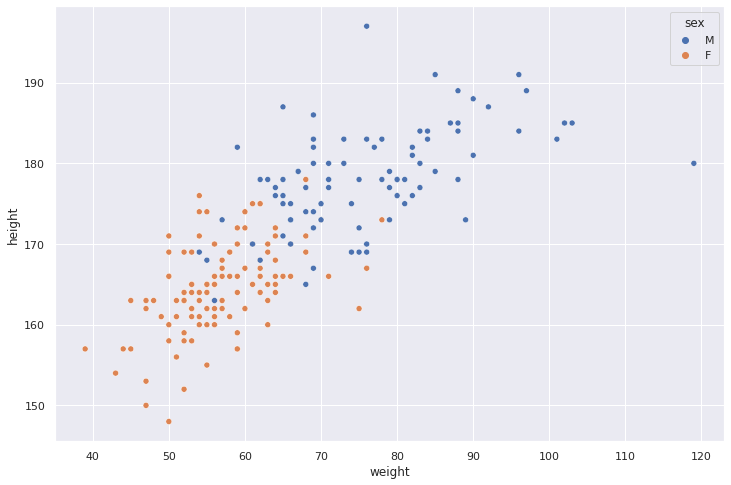

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(y='height', x='weight', hue='sex', data=humans)

### Обучение

In [4]:
humans.sex = humans.sex.map({'M': '0', 'F': '1'})
humans.head()

,sex,weight,height,repwt,repht
1,0,77,182,77.0,180.0
2,1,58,161,51.0,159.0
3,1,53,161,54.0,158.0
4,0,68,177,70.0,175.0
5,1,59,157,59.0,155.0


In [5]:
# Нормализуем признаки
X = humans[['weight', 'height']]
y = humans.sex.values.ravel()
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

In [6]:
# Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=19)

In [7]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Оценка качества

In [8]:
from sklearn.metrics import accuracy_score
y_pred = logit.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.939


In [9]:
theta_1 = logit.coef_[0][0]
theta_2 = logit.coef_[0][1]
theta_0 = logit.intercept_[0]

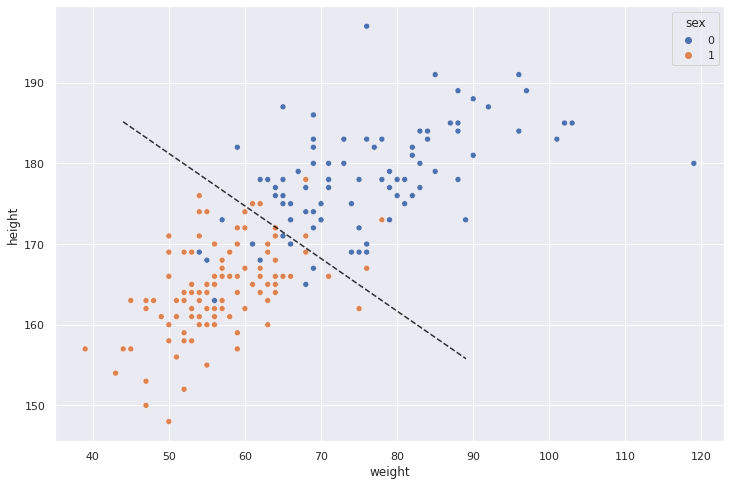

In [10]:
sns.scatterplot(y='height', x='weight',  hue='sex', data=humans);

x_tmp = np.linspace(humans['weight'].quantile(0.01), humans['weight'].quantile(0.95), 100)
y_tmp = - (theta_0 + (x_tmp - X.iloc[:,0].mean())/X.iloc[:,0].std()*theta_1)/theta_2

# Разделяющая классы прямая
plt.plot(x_tmp, X.iloc[:,1].std()*y_tmp + X.iloc[:,1].mean() , color="black", alpha=0.8, linestyle='--')

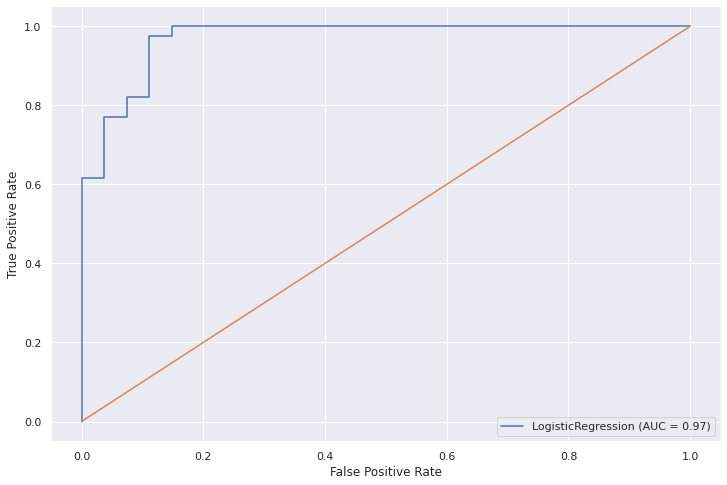

In [11]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logit, X_test, y_test)
x = linspace(0,1)
plt.plot(x, x)

### Добавление квадратичных признаков

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
squares = poly.fit_transform(X)
X_with_sqrs = pd.DataFrame(squares, columns=['x_0', 'x_1', 'x_2', 'x_1^2', 'x_1*x_2', 'x_2^2'])
X_with_sqrs.head()

,x_0,x_1,x_2,x_1^2,x_1*x_2,x_2^2
0,1.0,77.0,182.0,5929.0,14014.0,33124.0
1,1.0,58.0,161.0,3364.0,9338.0,25921.0
2,1.0,53.0,161.0,2809.0,8533.0,25921.0
3,1.0,68.0,177.0,4624.0,12036.0,31329.0
4,1.0,59.0,157.0,3481.0,9263.0,24649.0


In [13]:
# Нормализация
X_with_sqrs_norm = (X_with_sqrs - X_with_sqrs.mean())/X_with_sqrs.std()
X_with_sqrs_norm.x_0 = 1

In [14]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_with_sqrs_norm, y, test_size=0.33, random_state=19)

In [15]:
logit_sqrs = LogisticRegression()
logit_sqrs.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.939


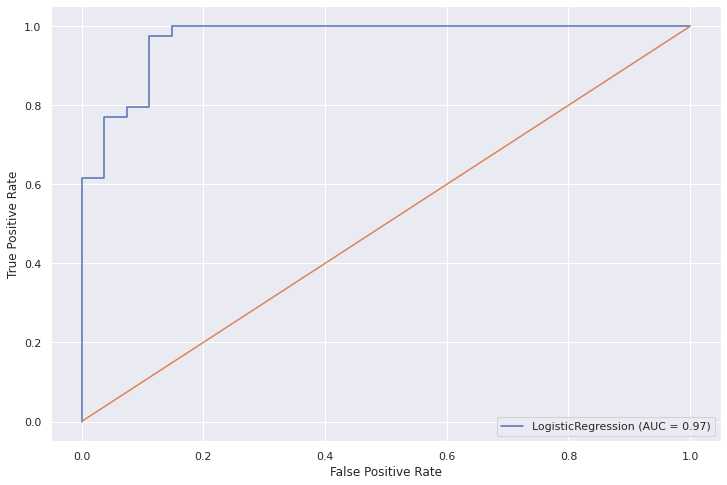

In [16]:
y_pred = logit_sqrs.predict(X_test);
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
plot_roc_curve(logit_sqrs, X_test, y_test);
x = linspace(0,1);
plt.plot(x, x);